# Descriptive Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preparation

In [ ]:
#Load the Dataset
property = pd.read_csv('/content/drive/My Drive/INF1340/Sources/property.csv')
property = property.dropna()
property.head()

,PID,LEGAL_TYPE,ZONE_DISTRICT,ZONE_CLASSIFICATION,STREET_NAME,PROPERTY_POSTAL_CODE,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY
0,024-363-715,LAND,RM-4,Multiple Family Dwelling,GRANDVIEW HWY N,V5N 1N3,7200000.0,43600.0,2016.0,5760000.0,42300.0,1962.0,1963.0,19625.26
1,010-562-559,LAND,RM-4N,Multiple Family Dwelling,BROADWAY E,V5N 1V7,3779000.0,989000.0,2016.0,3569000.0,787000.0,1969.0,1969.0,15488.91
2,024-029-785,STRATA,CD-1 (343),Comprehensive Development,GEORGIA ST W,V6E 4R3,196000.0,154000.0,2016.0,178000.0,149000.0,1998.0,1998.0,1107.98
3,014-814-480,LAND,RS-1,One Family Dwelling,ROSS ST,V5W 3K7,932000.0,28300.0,2016.0,764000.0,23500.0,1958.0,1958.0,3068.76
4,013-016-024,LAND,RS-1,One Family Dwelling,PENTICTON ST,V5R 1Y3,946000.0,15300.0,2016.0,749000.0,10500.0,1953.0,1953.0,4355.34


## Data Cleaning: Add two new columns

---





In [ ]:
#Feature Engineer: Add a column called tax rate , Improvement rate and Land Value Growth rate
property['Tax_Rate'] = property['TAX_LEVY'] / property['CURRENT_LAND_VALUE']
property['Tax_Rate'] = property['Tax_Rate'].map('{:.4f}'.format)

property['Land_Value_Growth_Rate'] = ((property['CURRENT_LAND_VALUE'] / property['PREVIOUS_LAND_VALUE']) - 1)
property['Land_Value_Growth_Rate'] = property['Land_Value_Growth_Rate'].map('{:.2f}'.format)

property.head()

,PID,LEGAL_TYPE,ZONE_DISTRICT,ZONE_CLASSIFICATION,STREET_NAME,PROPERTY_POSTAL_CODE,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,Tax_Rate,Land_Value_Growth_Rate
0,024-363-715,LAND,RM-4,Multiple Family Dwelling,GRANDVIEW HWY N,V5N 1N3,7200000.0,43600.0,2016.0,5760000.0,42300.0,1962.0,1963.0,19625.26,0.0027,0.25
1,010-562-559,LAND,RM-4N,Multiple Family Dwelling,BROADWAY E,V5N 1V7,3779000.0,989000.0,2016.0,3569000.0,787000.0,1969.0,1969.0,15488.91,0.0041,0.06
2,024-029-785,STRATA,CD-1 (343),Comprehensive Development,GEORGIA ST W,V6E 4R3,196000.0,154000.0,2016.0,178000.0,149000.0,1998.0,1998.0,1107.98,0.0057,0.10
3,014-814-480,LAND,RS-1,One Family Dwelling,ROSS ST,V5W 3K7,932000.0,28300.0,2016.0,764000.0,23500.0,1958.0,1958.0,3068.76,0.0033,0.22
4,013-016-024,LAND,RS-1,One Family Dwelling,PENTICTON ST,V5R 1Y3,946000.0,15300.0,2016.0,749000.0,10500.0,1953.0,1953.0,4355.34,0.0046,0.26


## Part 1 Continuous Variables Analysis

*Measure of Tendency (Mean, Mode, Median*)

In [ ]:
#Measure of Tendency for Current Land Value
Mean_CurrentValue = property['CURRENT_LAND_VALUE'].mean()
Median_CurrentValue = property['CURRENT_LAND_VALUE'].median()
Mode_CurrentValue = property['CURRENT_LAND_VALUE'].mode()[0]
print("Current Land Value Mean: {:.2f}".format(Mean_CurrentValue))
print("Current Land Value Median: {:.2f}".format(Median_CurrentValue))
print("Current Land Value Mode: {:.2f}".format(Mode_CurrentValue))

#Based on the result Mean>Median, the distribution of current land value is right-skewed.

Current Land Value Mean: 1185929.90
Current Land Value Median: 742000.00
Current Land Value Mode: 1020000.00


In [ ]:
#Measure of Tendency for Tax_LEVY
Mean_CurrentValue = property['TAX_LEVY'].mean()
Median_CurrentValue = property['TAX_LEVY'].median()
Mode_CurrentValue = property['TAX_LEVY'].mode()[0]
print("Property Tax Levy Amount Mean: {:.2f}".format(Mean_CurrentValue))
print("Property Tax Levy Amount Median: {:.2f}".format(Median_CurrentValue))
print("Property TAx Levy Amount Mode: {:.2f}".format(Mode_CurrentValue))
#Based on the result Mean>Median, the distribution of tax levy is right-skewed.

Property Tax Levy Amount Mean: 7404.21
Property Tax Levy Amount Median: 3710.36
Property TAx Levy Amount Mode: 0.00


In [ ]:
skewness_CurrentValue = property['CURRENT_LAND_VALUE'].skew()
kurtosis_CurrentValue = property['CURRENT_LAND_VALUE'].kurtosis()
print(f"Current Land Value Skewness: {skewness_CurrentValue:.2f}")
print(f"Current Land Value Kurtosis: {kurtosis_CurrentValue:.2f}")

#The skewness value of 55.93 and kurtosis value of 5786.26 for a variable indicate extreme departures
#from normality in the distribution of that variable current land value. The histogram provides valid evidence for this.

Current Land Value Skewness: 55.93
Current Land Value Kurtosis: 5786.26


In [ ]:
skewness_TaxLevy = property['TAX_LEVY'].skew()
kurtosis_TaxLevy = property['TAX_LEVY'].kurtosis()
print(f"TAX_LEVY Skewness: {skewness_TaxLevy:.2f}")
print(f"TAX_LEVY Kurtosis: {kurtosis_TaxLevy:.2f}")
#The skewness value of 75.74 and kurtosis value of 8034.07 for a variable indicate extreme departures
#from normality in the distribution of that variable tax levy . The histogram provides valid evidence for this.

TAX_LEVY Skewness: 75.44
TAX_LEVY Kurtosis: 8034.07


### Plot a histogram of the Current Value


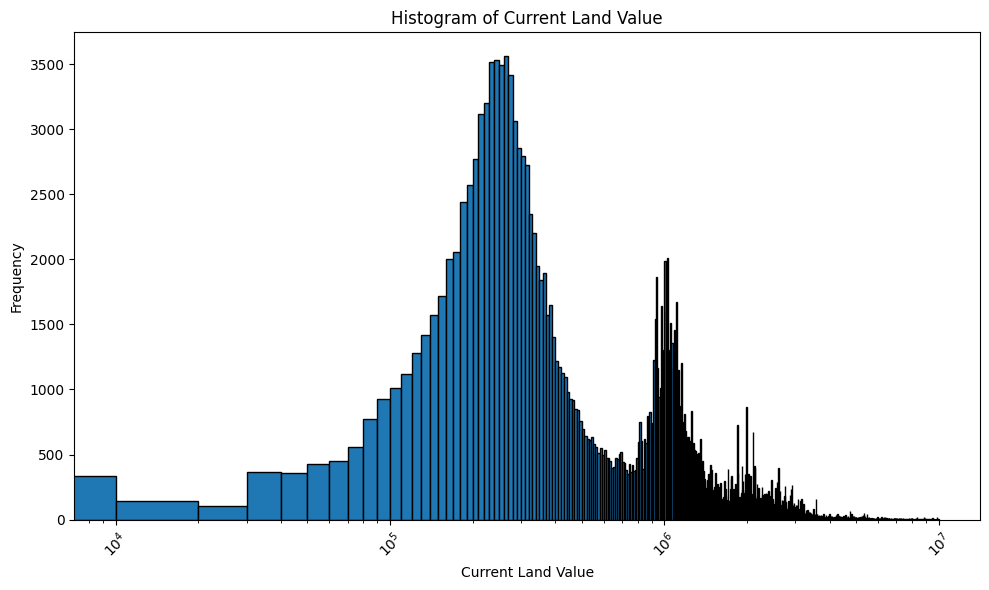

In [ ]:
custom_bins = list(range(0, 10000000, 10000))

plt.figure(figsize=(10, 6))
plt.hist(property['CURRENT_LAND_VALUE'], bins=custom_bins, edgecolor='black')
plt.xlabel('Current Land Value')
plt.xscale('log')
plt.ylabel('Frequency')
plt.title('Histogram of Current Land Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

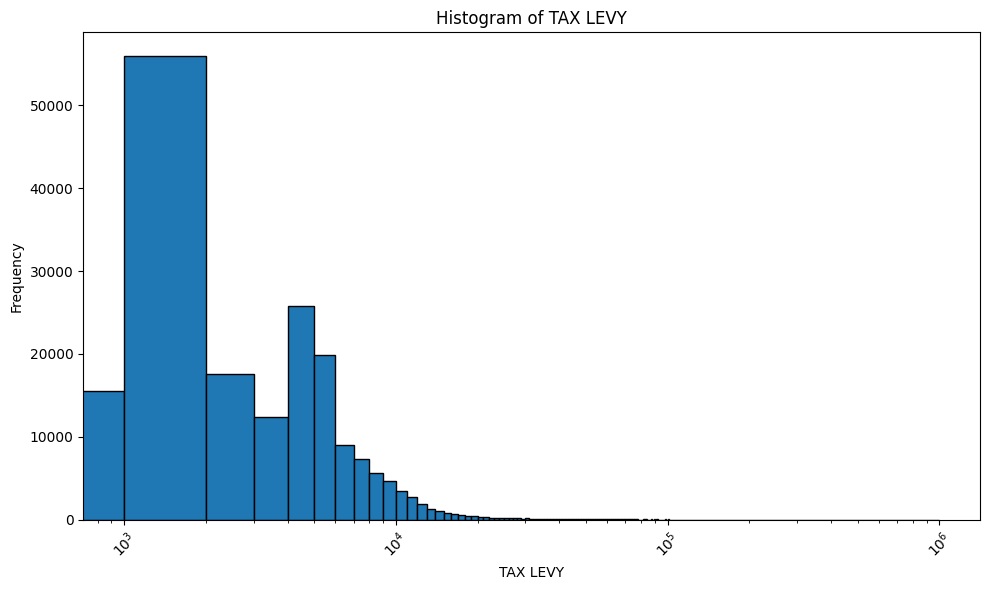

In [ ]:
# Histogram of the TAX LEVY
custom_bins = list(range(0, 1000000, 1000))

plt.figure(figsize=(10, 6))
plt.hist(property['TAX_LEVY'], bins=custom_bins, edgecolor='black')
plt.xlabel('TAX LEVY')
plt.xscale('log')
plt.ylabel('Frequency')
plt.title('Histogram of TAX LEVY')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Measure* of Varability (range, variance, standard deviation, IQR)

In [ ]:
#Measure of Varability for Current Value
Range_CurrentValue = property['CURRENT_LAND_VALUE'].max()-property['CURRENT_LAND_VALUE'].min()
Variance_CurrentValue = property['CURRENT_LAND_VALUE'].var()
Std_CurrentValue = property['CURRENT_LAND_VALUE'].std()
Percent_CurrentValue = property['CURRENT_LAND_VALUE'].quantile([0.25, 0.5, 0.75])
IQR_CurrentValue = property['CURRENT_LAND_VALUE'].quantile(0.75) - property['CURRENT_LAND_VALUE'].quantile(0.25)

print(f"Range of Current Land Value: {Range_CurrentValue:.2f}")
print(f"Variance of Current Land Value: {Variance_CurrentValue:.2f}")
print(f"Standard Deviation of Current Land Value: {Std_CurrentValue:.2f}")
print("Percentiles of Current Land Value:")
print(f"   25th Percentile (Q1): {Percent_CurrentValue[0.25]:.2f}")
print(f"   50th Percentile (Median or Q2): {Percent_CurrentValue[0.5]:.2f}")
print(f"   75th Percentile (Q3): {Percent_CurrentValue[0.75]:.2f}")
print(f"Interquartile Range of Current Land Value: {IQR_CurrentValue:.2f}")

Range of Current Land Value: 590197000.00
Variance of Current Land Value: 14312924569537.39
Standard Deviation of Current Land Value: 3783242.60
Percentiles of Current Land Value:
   25th Percentile (Q1): 280000.00
   50th Percentile (Median or Q2): 742000.00
   75th Percentile (Q3): 1250000.00
Interquartile Range of Current Land Value: 970000.00


<Axes: >

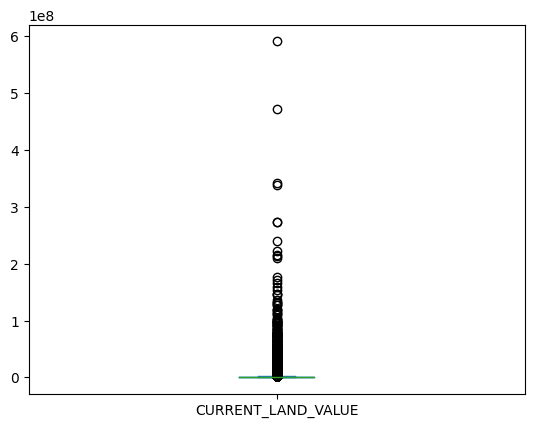

In [ ]:
#Box Plot for the Current Value
property['CURRENT_LAND_VALUE'].plot(kind='box')

In [ ]:
#Measure of Varability for Tax LEVY
Range_TaxLevy = property['TAX_LEVY'].max()-property['TAX_LEVY'].min()
Variance_TaxLevy = property['TAX_LEVY'].var()
Std_TaxLevy = property['TAX_LEVY'].std()
Percent_TaxLevy =property['TAX_LEVY'].quantile([0.25, 0.5, 0.75])
IQR_TaxLevy = property['TAX_LEVY'].quantile(0.75) - property['TAX_LEVY'].quantile(0.25)

print(f"Range of Tax Levy: {Range_TaxLevy:.2f}")
print(f"Variance of Tax Levy: {Variance_TaxLevy:.2f}")
print(f"Standard Deviation of Tax Levy: {Std_TaxLevy:.2f}")
print("Percentiles of Tax Levy:")
print(f"   25th Percentile (Q1): {Percent_TaxLevy[0.25]:.2f}")
print(f"   50th Percentile (Median or Q2): {Percent_TaxLevy[0.5]:.2f}")
print(f"   75th Percentile (Q3): {Percent_TaxLevy[0.75]:.2f}")
print(f"Interquartile Range of Tax Levy: {IQR_TaxLevy:.2f}")

Range of Tax Levy: 9879160.80
Variance of Tax Levy: 4342562059.59
Standard Deviation of Tax Levy: 65898.12
Percentiles of Tax Levy:
   25th Percentile (Q1): 1481.53
   50th Percentile (Median or Q2): 3710.36
   75th Percentile (Q3): 5841.27
Interquartile Range of Tax Levy: 4359.74


<Axes: >

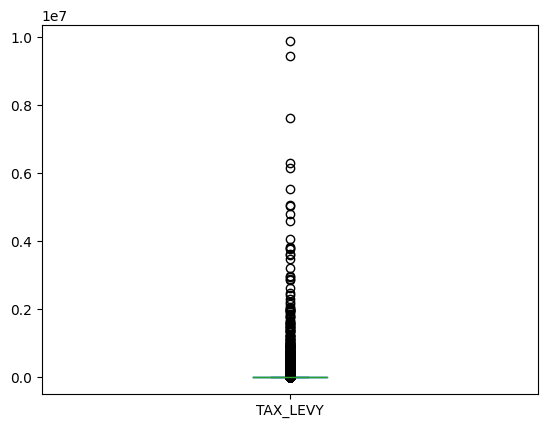

In [ ]:
#Box Plot for the Current Value
property['TAX_LEVY'].plot(kind='box')


## Part 3 Frequency Analysis of Categorical Variables

In [ ]:
#Frequency Analysis of Legal type
legal_type_counts = property['LEGAL_TYPE'].value_counts()
legal_type_counts
#STRATA and LAND are the two main types of the legal type. Each of them takes up nearly half of the property type.

STRATA    106962
LAND       86588
OTHER          9
Name: LEGAL_TYPE, dtype: int64

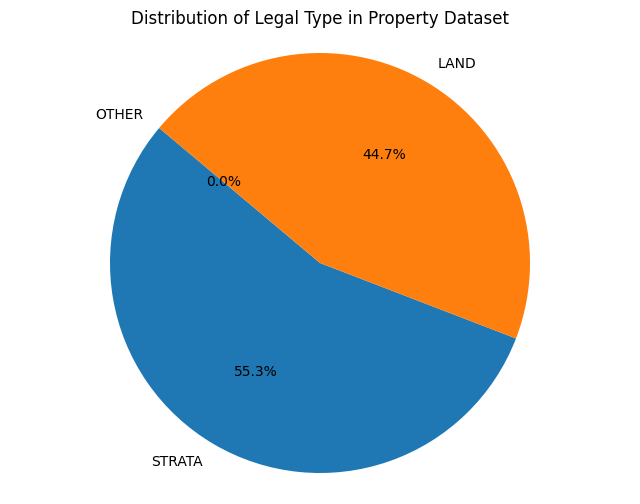

In [ ]:
# Pie chart to show the distribution of Legal Type
property['LEGAL_TYPE'].value_counts().plot(kind='pie', figsize=(8, 6), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Legal Type in Property Dataset')
plt.ylabel('')
plt.axis('equal')
plt.show()

In [ ]:
# Frequency analysis of Zone classification
Zone_counts = property['ZONE_CLASSIFICATION'].value_counts()
Zone_counts
#One Family Dwelling and Comprehensive Development are the two largest types of Zone classification.
# One Family Dwelling and Comprehensive Development takes 30% to 35% of the Zone Classification.
#the property that is zone classified as Limited Agricultural is the smallest.

One Family Dwelling          67197
Comprehensive Development    62255
Multiple Family Dwelling     26958
Commercial                   16854
Two Family Dwelling          14312
Light Industrial              2661
Historic Area                 2237
Industrial                     943
Limited Agricultural           142
Name: ZONE_CLASSIFICATION, dtype: int64

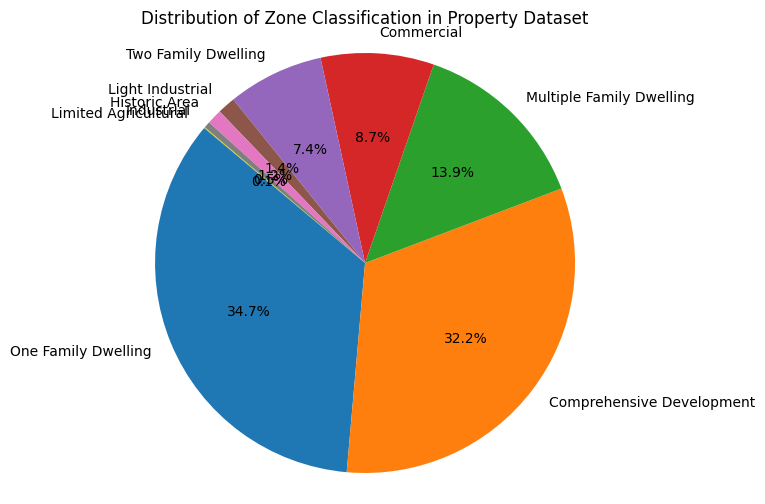

In [ ]:
# Pie chart to show the distribution of Zone Classification
property['ZONE_CLASSIFICATION'].value_counts().plot(kind='pie', figsize=(8, 6), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Zone Classification in Property Dataset')
plt.ylabel('')
plt.axis('equal')
plt.show()

## Part 4 Categorical Variables Comparision

In [ ]:
# Clean the Tax Rate columns (remove the infinity, NA and conver to numerical values)
property['Tax_Rate'] = pd.to_numeric(property['Tax_Rate'], errors='coerce')
property = property[np.isfinite(property['Tax_Rate'])]

In [ ]:
# Calculate the tax Rate by legal type
tax_legal_type = property.groupby('LEGAL_TYPE')['Tax_Rate'].mean().reset_index()

print(tax_legal_type)
#Legal type of land has the highest average tax rate and legal type of Other has smallest average tax rate.

  LEGAL_TYPE  Tax_Rate
0       LAND  0.963403
1      OTHER  0.006567
2     STRATA  0.019854


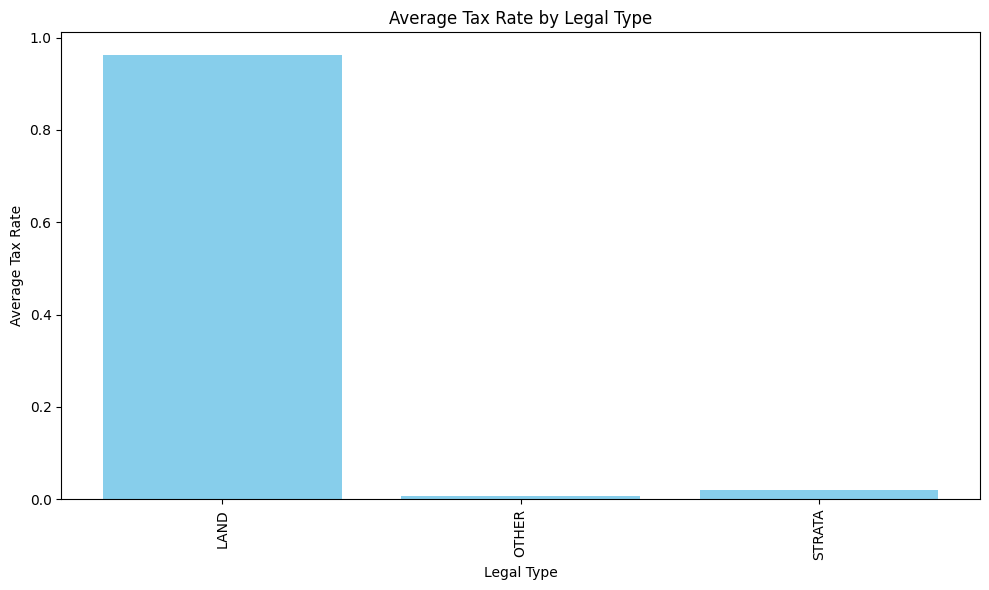

In [ ]:
# Bar chart to show the average tax rate by legal type
plt.figure(figsize=(10, 6))
plt.bar(tax_legal_type['LEGAL_TYPE'], tax_legal_type['Tax_Rate'], color='skyblue')
plt.xlabel('Legal Type')
plt.ylabel('Average Tax Rate')
plt.title('Average Tax Rate by Legal Type')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

In [ ]:
# Clean the Improvement  columns (remove the infinity, NA and conver to numerical values)
property['Land_Value_Growth_Rate'] = pd.to_numeric(property['Land_Value_Growth_Rate'], errors='coerce')
property = property[np.isfinite(property['Land_Value_Growth_Rate'])]

In [ ]:
# Calculate the land growth rate by Zone Classification
landgrowth_Zone = property.groupby('ZONE_CLASSIFICATION')['Land_Value_Growth_Rate'].mean().reset_index()
print(landgrowth_Zone)
#The zone classification of comprehensive development has the largest growth of more than 1500 times than in the past.
#Afterwards, limited agricultural had the second largest growth of more than 1200 times before.
#However, the Historic area has the smallest average growth of just 12%.

         ZONE_CLASSIFICATION  Land_Value_Growth_Rate
0                 Commercial                0.141808
1  Comprehensive Development               15.598990
2              Historic Area                0.116603
3                 Industrial                0.474571
4           Light Industrial                0.199087
5       Limited Agricultural               12.302394
6   Multiple Family Dwelling                0.147982
7        One Family Dwelling                0.253485
8        Two Family Dwelling                0.229871


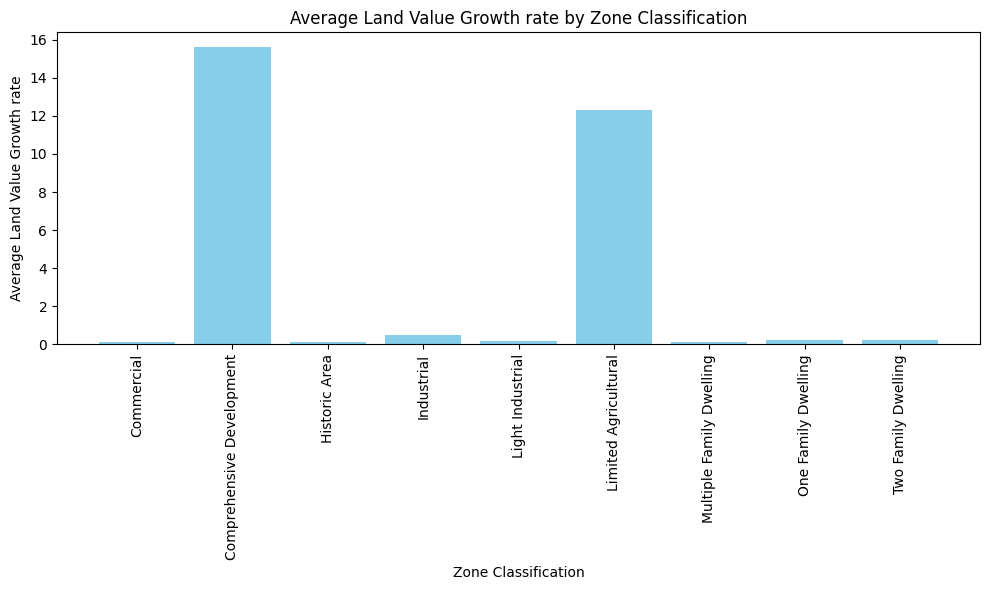

In [ ]:
# Bar chart to show the average Land Value Growth rate by Zone Classification
plt.figure(figsize=(10, 6))
plt.bar(landgrowth_Zone['ZONE_CLASSIFICATION'], landgrowth_Zone['Land_Value_Growth_Rate'], color='skyblue')
plt.xlabel('Zone Classification')
plt.ylabel('Average Land Value Growth rate')
plt.title('Average Land Value Growth rate by Zone Classification')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

# **Diagnosis analysis**

 Part 1: Comparative Analysis by Legal Type

Mounted at /drive


<ipython-input-9-df8efb8981f1>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data_trends = property.groupby('LEGAL_TYPE').mean()


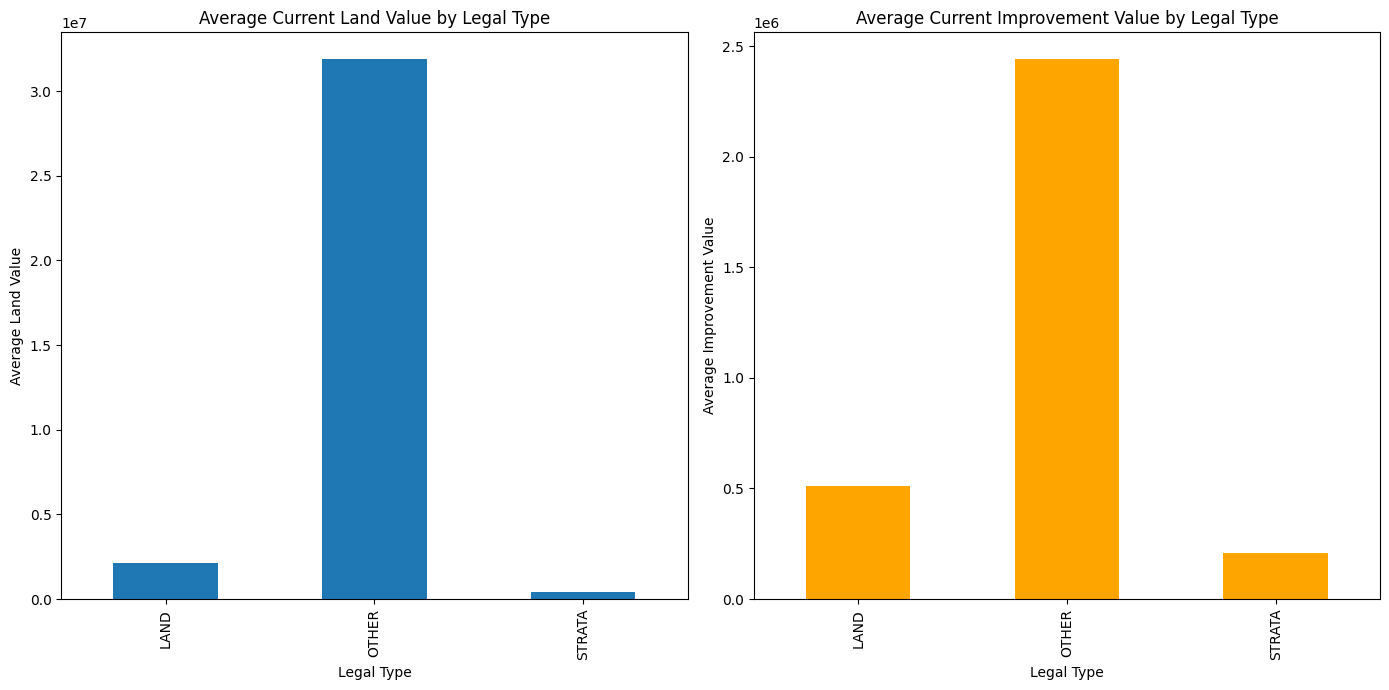

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/drive', force_remount=True)

# Load the Dataset
property = pd.read_csv('/drive/MyDrive/inf1340/property.csv')
property = property.dropna()
property.head()


# Grouping data by legal type and calculating mean values for comparison
grouped_data_trends = property.groupby('LEGAL_TYPE').mean()

# Plotting trends for each legal type using bar graphs
plt.figure(figsize=(14, 7))

# Plot for average current land value
plt.subplot(1, 2, 1)
grouped_data_trends['CURRENT_LAND_VALUE'].plot(kind='bar')
plt.title('Average Current Land Value by Legal Type')
plt.ylabel('Average Land Value')
plt.xlabel('Legal Type')

# Plot for average current improvement value
plt.subplot(1, 2, 2)
grouped_data_trends['CURRENT_IMPROVEMENT_VALUE'].plot(kind='bar', color='orange')
plt.title('Average Current Improvement Value by Legal Type')
plt.ylabel('Average Improvement Value')
plt.xlabel('Legal Type')

plt.tight_layout()
plt.show()


Two sample t test: 'Strata' & 'Land'

In [ ]:
# Filtering data for 'Strata' and 'Land' legal types
strata_data = property[property['LEGAL_TYPE'] == 'STRATA']['CURRENT_LAND_VALUE']
land_data = property[property['LEGAL_TYPE'] == 'LAND']['CURRENT_LAND_VALUE']

# Perform a two-sample t-test
t_test_result = stats.ttest_ind(strata_data.dropna(), land_data.dropna(), equal_var=False)

print(t_test_result)

TtestResult(statistic=-92.33089216178084, pvalue=0.0, df=87800.12580237564)


Part 2: Analysis of Outliers

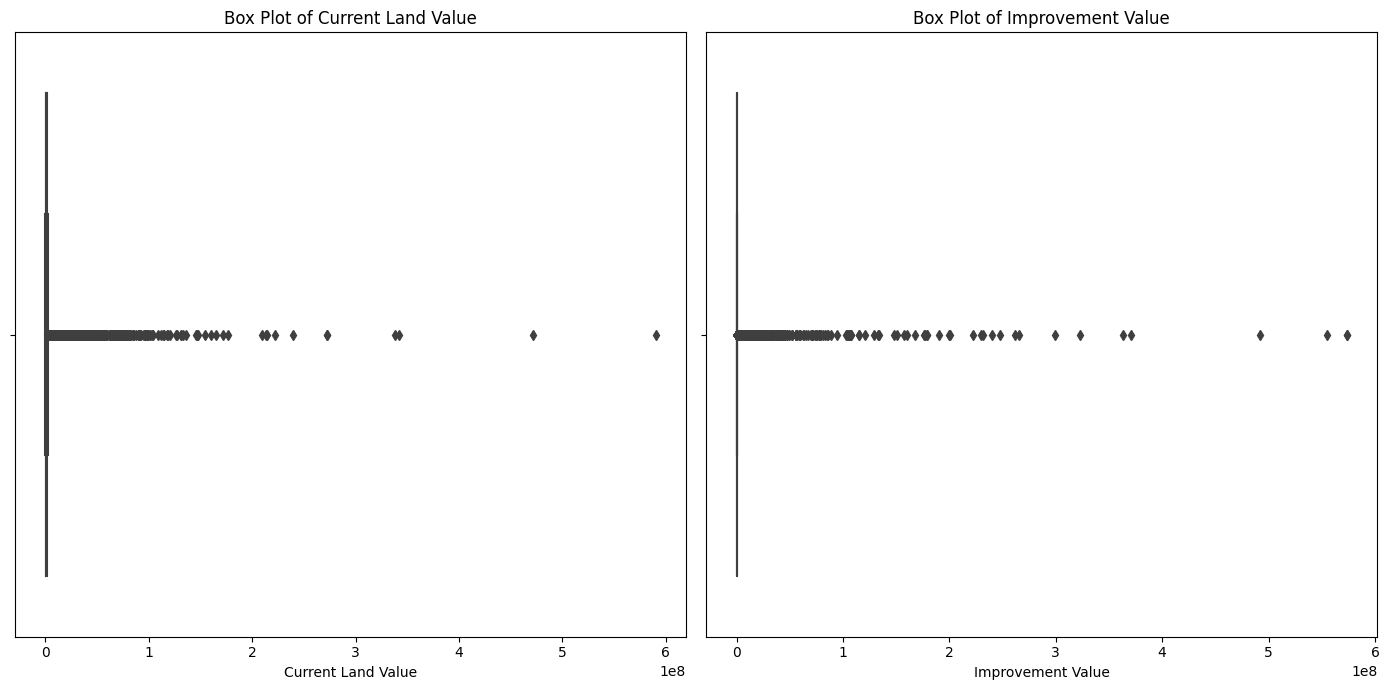

In [ ]:
# Creating box plots to identify outliers
plt.figure(figsize=(14, 7))

# Box plot for 'Current Land Value'
plt.subplot(1, 2, 1)
sns.boxplot(data=property, x='CURRENT_LAND_VALUE')
plt.title('Box Plot of Current Land Value')
plt.xlabel('Current Land Value')

# Box plot for 'Improvement Value'
plt.subplot(1, 2, 2)
sns.boxplot(data=property, x='CURRENT_IMPROVEMENT_VALUE')
plt.title('Box Plot of Improvement Value')
plt.xlabel('Improvement Value')

plt.tight_layout()
plt.show()

Part 3: Regional Comparison

<ipython-input-23-58b95ba3674c>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data_by_location = property.groupby(location_column).mean()


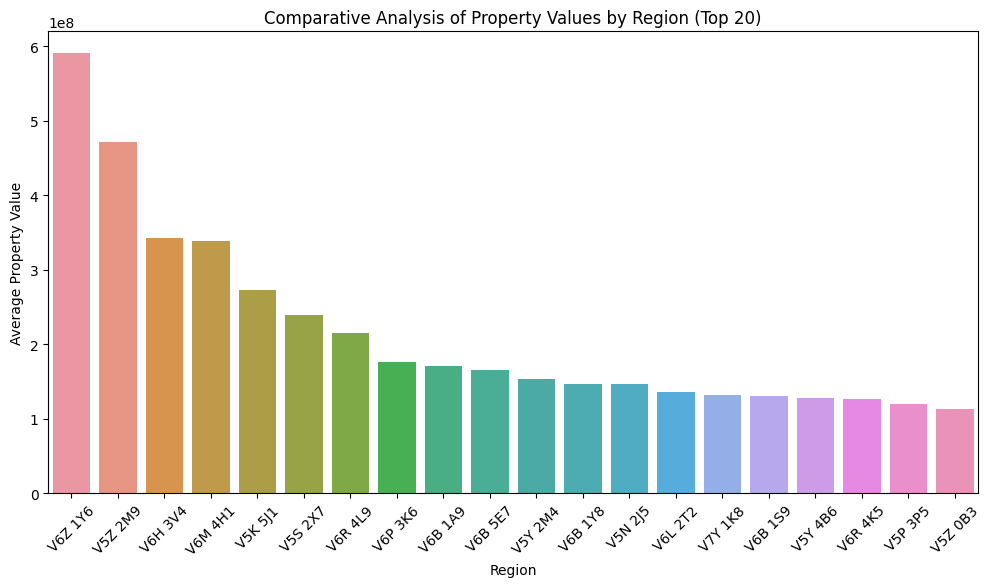

In [ ]:
# Columns based on the data set
location_column = 'PROPERTY_POSTAL_CODE'
value_column = 'CURRENT_LAND_VALUE'

# Grouping data by location and calculating mean property values for comparison
grouped_data_by_location = property.groupby(location_column).mean()

# Sorting the data for better visualization
sorted_grouped_data = grouped_data_by_location.sort_values(by=value_column, ascending=False)

# Limiting the number of regions for visualization to make it more manageable
#focusing on the top 20 regions
top_regions = sorted_grouped_data.head(20)

# Plotting the regional comparison for a limited number of regions
plt.figure(figsize=(12, 6))
sns.barplot(x=top_regions.index, y=top_regions[value_column])
plt.xticks(rotation=45)
plt.title('Comparative Analysis of Property Values by Region (Top 20)')
plt.xlabel('Region')
plt.ylabel('Average Property Value')
plt.show()

Part 4: Property Type Analysis

<ipython-input-10-a96a1f23422e>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data_by_type = property.groupby(property_type_column).mean()


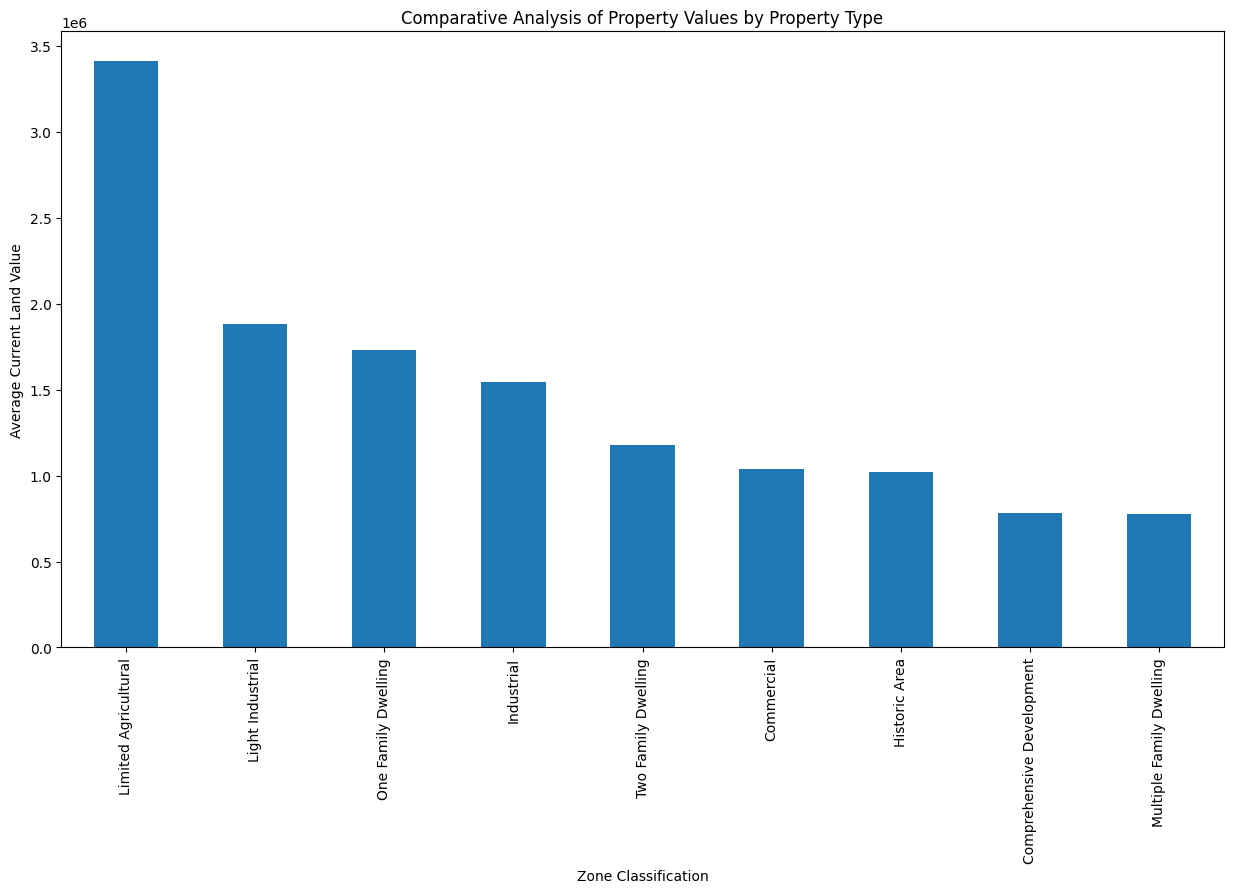

In [ ]:

property_type_column = 'ZONE_CLASSIFICATION'
value_column = 'CURRENT_LAND_VALUE'

# Grouping data by zone classification and calculating mean current values
grouped_data_by_type = property.groupby(property_type_column).mean()

# Sorting the data for better visualization
sorted_grouped_data = grouped_data_by_type.sort_values(by=value_column, ascending=False)

# Plotting the property type analysis
plt.figure(figsize=(15, 8))
sorted_grouped_data[value_column].plot(kind='bar')
plt.title('Comparative Analysis of Property Values by Property Type')
plt.ylabel('Average Current Land Value')
plt.xlabel('Zone Classification')
plt.xticks(rotation=90)
plt.show()




ANOVA: 'Zone classification' & 'Current land value'

In [ ]:
import scipy.stats as stats

# Define the columns for analysis
property_type_column = 'ZONE_CLASSIFICATION'
value_column = 'CURRENT_LAND_VALUE'

# Grouping data by zone classification
grouped_data_by_type = property.groupby(property_type_column)[value_column].apply(list)

# Performing ANOVA
anova_result = stats.f_oneway(*grouped_data_by_type)

print(anova_result)

F_onewayResult(statistic=329.7730966933842, pvalue=0.0)


<ipython-input-78-5fe569475d1e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = filtered_VanPro.corr()


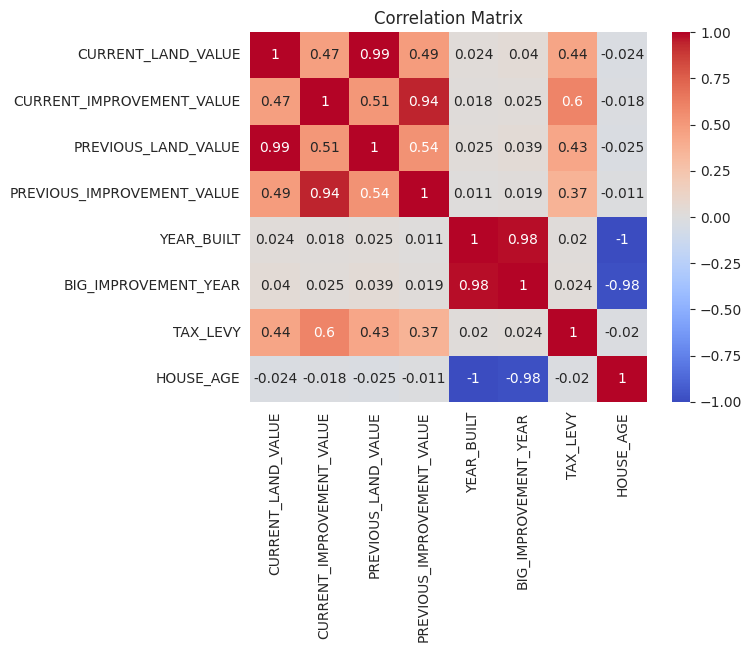

In [ ]:
# Correlation Analysis: Create the correlation matrix for numerical values in the DataFrame to see the relationship between different columns
correlation_matrix = property.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Predictive Analysis**

### **Predictive analysis 1: linear regression to predict the properties current market value**

In [ ]:
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For attractive and informative statistical graphics

# Data preparation
# Load the Vancouver Property Assessment dataset using pandas. Set the building year range from 2006 to 2014
VanPro = pd.read_csv('/content/drive/My Drive/INF1340/Sources/property.csv')  # Load the property data
filtered_VanPro = VanPro[(VanPro['YEAR_BUILT'] >= 2006) & (VanPro['YEAR_BUILT'] <= 2014)]

# Drop the TAX_ASSESSMENT_YEAR as they are all assessed in 2016
filtered_VanPro = filtered_VanPro.drop(columns=['TAX_ASSESSMENT_YEAR'])

# Transfer year column into integer
filtered_VanPro['YEAR_BUILT'] = filtered_VanPro['YEAR_BUILT'].astype(int)
filtered_VanPro['BIG_IMPROVEMENT_YEAR'] = filtered_VanPro['BIG_IMPROVEMENT_YEAR'].astype(int)

# Convert year built to house age to minimize the additional impact of year built on the house's marketing value
current_year = 2014
filtered_VanPro['HOUSE_AGE'] = current_year - filtered_VanPro['YEAR_BUILT']
filtered_VanPro

# Drop rows with null values in the specified columns
filtered_VanPro_cleaned = filtered_VanPro.dropna()
filtered_VanPro_cleaned.head()

,PID,LEGAL_TYPE,ZONE_DISTRICT,ZONE_CLASSIFICATION,STREET_NAME,PROPERTY_POSTAL_CODE,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,HOUSE_AGE
40,011-041-650,LAND,RS-1,One Family Dwelling,CROWN CRES,V6R 2A8,5263000.0,929000.0,4354000.0,1008000.0,2009,2010,21110.84,5
41,027-506-801,STRATA,C-3A,Commercial,8TH AVE W,V6J 0B1,359000.0,178000.0,339000.0,174000.0,2008,2008,1699.97,6
43,029-410-771,STRATA,CD-1 (517),Comprehensive Development,CORNISH ST,V6P 0C2,236000.0,213000.0,77900.0,352000.0,2014,2014,1421.39,0
61,027-851-923,STRATA,CD-1 (456),Comprehensive Development,CROWE ST,V5Y 0A2,350000.0,178000.0,317000.0,173000.0,2009,2009,1671.48,5
164,013-389-033,LAND,RT-8,Two Family Dwelling,CORNWALL AVE,V6K 1C1,2937000.0,1785000.0,2595000.0,598000.0,2014,2014,14537.30,0


<ipython-input-4-c1029f943a58>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_VanPro_cleaned.loc[:, value] = filtered_VanPro_cleaned[value] / 100000


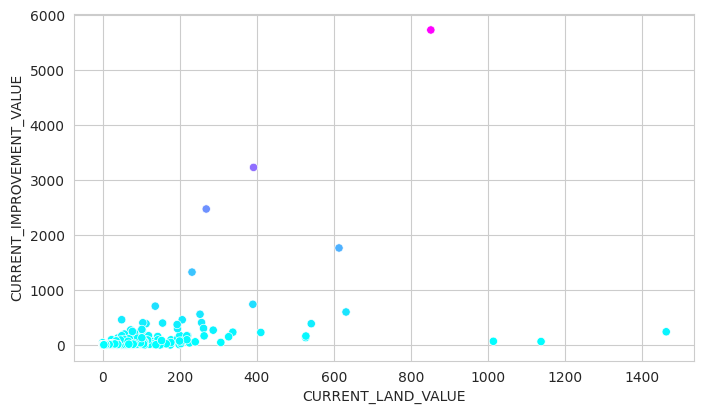

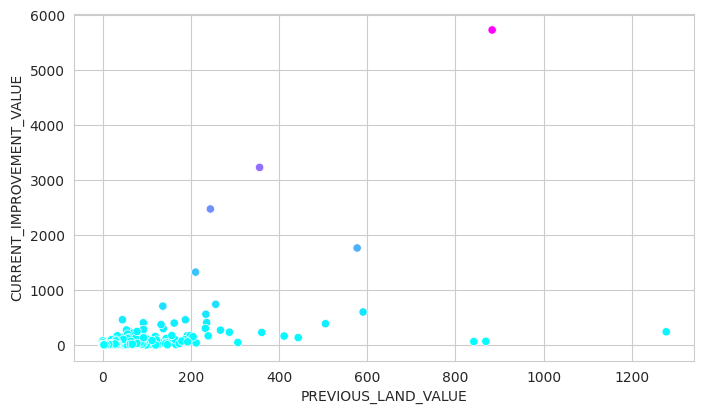

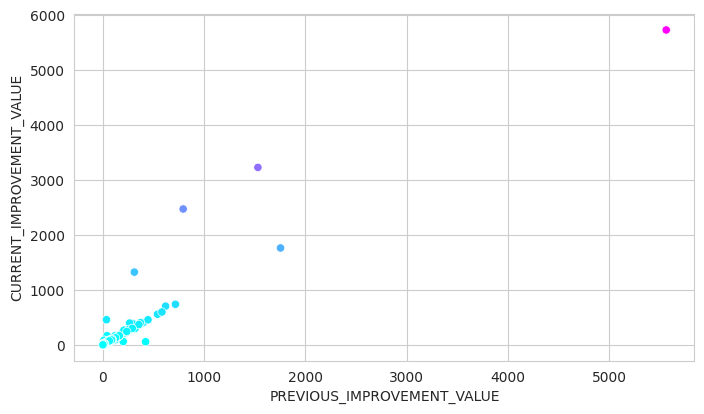

In [ ]:
# For numerical values divide them by 100,000 to scale them down
value_list = ['CURRENT_LAND_VALUE','CURRENT_IMPROVEMENT_VALUE', 'PREVIOUS_LAND_VALUE','PREVIOUS_IMPROVEMENT_VALUE', 'TAX_LEVY' ]
for value in value_list:
  filtered_VanPro_cleaned.loc[:, value] = filtered_VanPro_cleaned[value] / 100000

# Plot each feature's relationship with current improvement value
sns.set_style('whitegrid')
feature_list = ['CURRENT_LAND_VALUE', 'PREVIOUS_LAND_VALUE','PREVIOUS_IMPROVEMENT_VALUE']

for feature in feature_list:
  plt.figure(figsize=(8,4.5))
  sns.scatterplot(data=filtered_VanPro_cleaned, x=feature,
                  y='CURRENT_IMPROVEMENT_VALUE', hue='CURRENT_IMPROVEMENT_VALUE',
                  palette='cool', legend=False)

# From the list we can see that previous improvement value and current improvement value have a quite clear linear relationship

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Set values for X and y
X_feature = filtered_VanPro_cleaned[['PREVIOUS_LAND_VALUE', 'PREVIOUS_IMPROVEMENT_VALUE', 'CURRENT_LAND_VALUE']]
y_target = filtered_VanPro_cleaned['CURRENT_IMPROVEMENT_VALUE']


In [ ]:
import statsmodels.api as sm
import numpy as np

# Add a constant term (intercept) and perform the initial OLS regression with all features
X_feature_with_const = sm.add_constant(X_feature)
model = sm.OLS(y_target, X_feature_with_const).fit()


In [ ]:
# Display the summary of the initial model
model.summary()
# The result also supports the graph found above,
# which shows that the coefficient for previous improvement value is significantly different from zero

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     CURRENT_IMPROVEMENT_VALUE   R-squared:                       0.890
Model:                                   OLS   Adj. R-squared:                  0.890
Method:                        Least Squares   F-statistic:                 9.293e+04
Date:                       Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                               23:59:40   Log-Likelihood:            -1.3975e+05
No. Observations:                      34583   AIC:                         2.795e+05
Df Residuals:                          34579   BIC:                         2.795e+05
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.4071      0.081     -5.035      0.000      -0.566      -0.249
PREVIOUS_LAND_VALUE            0.0288      0.048      0.594      0.552      -0.066       0.124
PREVIOUS_IMPROVEMENT_VALUE     1.1207      0.003    390.757      0.000       1.115       1.126
CURRENT_LAND_VALUE            -0.0032      0.040     -0.081      0.936      -0.082       0.075
==============================================================================
Omnibus:                   132724.074   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     143204282495.709
Skew:                          89.870   Prob(JB):                         0.00
Kurtosis:                    9970.395   Cond. No.                         42.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above analysis shows that only coefficient for previous improvement value is significant, so I perform the simple linear regression based on the trained test and test the accuracy.

In [ ]:
# Drop non-significant factors from the X_feature list
X_feature.drop(['PREVIOUS_LAND_VALUE', 'CURRENT_LAND_VALUE'], axis=1, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, random_state=11)


<ipython-input-8-db9ea2a19a6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_feature.drop(['PREVIOUS_LAND_VALUE', 'CURRENT_LAND_VALUE'], axis=1, inplace=True)


In [ ]:
# Training the model
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)


LinearRegression()

In [ ]:
# Print the coefficient and intercept of the linear regression model
print("Coefficient of previous improvement value: ", linear_regression.coef_)
print("Intercept: ", linear_regression.intercept_)

Coefficient of previous improvement value:  [1.02813206]
Intercept:  0.037135090021866546


In [ ]:
# Testing the model
predicted = linear_regression.predict(X_test)
expected = y_test

# Print out the first 5 predictions and targets
print(expected[:5])
print(predicted[:5])


61104    3.57
75970    1.54
88493    1.27
75811    2.76
54492    1.83
Name: CURRENT_IMPROVEMENT_VALUE, dtype: float64
[3.59447203 1.56905186 1.30173753 2.79252902 2.11396186]


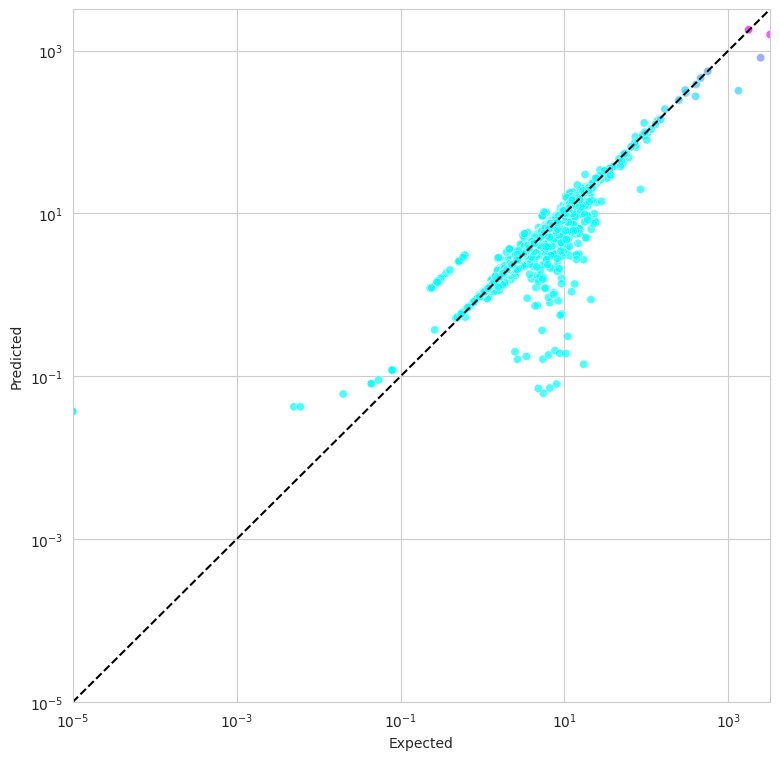

In [ ]:
# Visualizing the expected and predicted current market prices for properties
df = pd.DataFrame({'Expected': expected, 'Predicted': predicted})

# Plot the data
figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
                       hue='Predicted', palette='cool', legend=False, alpha=0.7)

# Set axis limits
start = min(df['Expected'].min(), df['Predicted'].min())
end = max(df['Expected'].max(), df['Predicted'].max())
axes.set_xlim(start, end)
axes.set_ylim(start, end)

# Set log scale for better visualization
axes.set_xscale('log')
axes.set_yscale('log')

# Add a diagonal line for reference
line = plt.plot([start, end], [start, end], 'k--')

# Show the plot
plt.show()


In [ ]:
# use regression model metrics to see the model's accuracy
import sklearn.metrics as sm
print("R2 score =", round(sm.r2_score(expected, predicted), 2))
# The R2 score here is 71%, which means the model is able to predict the data relatively well

R2 score = 0.71


### **Predictive analysis 2: using logistic regression to predict housing price up and down**

two columns in this dataset are previous improvement value and current improvement(market) value, the positive and negative sign for them the simplified version of having profit (or loss) for the house owners if they want to sell the house. Here I would use a logistic regression to test on it.

In [ ]:
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For attractive and informative statistical graphics

# Data preparation
# Load the Vancouver Property Assessment dataset using pandas. Set the building year range from 2006 to 2014
VanPro = pd.read_csv('/content/drive/My Drive/INF1340/Sources/property.csv')  # Load the property data
filtered_VanPro = VanPro[(VanPro['YEAR_BUILT'] >= 2006) & (VanPro['YEAR_BUILT'] <= 2014)]

# Drop the TAX_ASSESSMENT_YEAR as they are all assessed in 2016
filtered_VanPro = filtered_VanPro.drop(columns=['TAX_ASSESSMENT_YEAR'])

# Transfer year column into integer
filtered_VanPro['YEAR_BUILT'] = filtered_VanPro['YEAR_BUILT'].astype(int)
filtered_VanPro['BIG_IMPROVEMENT_YEAR'] = filtered_VanPro['BIG_IMPROVEMENT_YEAR'].astype(int)

# Convert year built to house age to minimize the additional impact of year built on the house's marketing value
current_year = 2014
filtered_VanPro['HOUSE_AGE'] = current_year - filtered_VanPro['YEAR_BUILT']

# Drop rows with null values in the specified columns
filtered_VanPro_cleaned = filtered_VanPro.dropna()
filtered_VanPro_cleaned.head()

,PID,LEGAL_TYPE,ZONE_DISTRICT,ZONE_CLASSIFICATION,STREET_NAME,PROPERTY_POSTAL_CODE,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,HOUSE_AGE
40,011-041-650,LAND,RS-1,One Family Dwelling,CROWN CRES,V6R 2A8,5263000.0,929000.0,4354000.0,1008000.0,2009,2010,21110.84,5
41,027-506-801,STRATA,C-3A,Commercial,8TH AVE W,V6J 0B1,359000.0,178000.0,339000.0,174000.0,2008,2008,1699.97,6
43,029-410-771,STRATA,CD-1 (517),Comprehensive Development,CORNISH ST,V6P 0C2,236000.0,213000.0,77900.0,352000.0,2014,2014,1421.39,0
61,027-851-923,STRATA,CD-1 (456),Comprehensive Development,CROWE ST,V5Y 0A2,350000.0,178000.0,317000.0,173000.0,2009,2009,1671.48,5
164,013-389-033,LAND,RT-8,Two Family Dwelling,CORNWALL AVE,V6K 1C1,2937000.0,1785000.0,2595000.0,598000.0,2014,2014,14537.30,0


In [ ]:
# Add a column at end to see the diffence between current market value and current land value
filtered_VanPro_cleaned['IMPROVEMENT_VALUE_CHANGE'] = filtered_VanPro_cleaned['CURRENT_IMPROVEMENT_VALUE'].astype(float) -filtered_VanPro_cleaned['PREVIOUS_IMPROVEMENT_VALUE'].astype(float)

# Assign 1 to positive value for the improvement value change and 0 to the negative value change
filtered_VanPro_cleaned['IMPROVEMENT_VALUE_CHANGE_BINARY'] = filtered_VanPro_cleaned['IMPROVEMENT_VALUE_CHANGE'].apply(lambda x: 1 if x >= 0 else 0)


<ipython-input-16-0c98205a6528>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_VanPro_cleaned['IMPROVEMENT_VALUE_CHANGE'] = filtered_VanPro_cleaned['CURRENT_IMPROVEMENT_VALUE'].astype(float) -filtered_VanPro_cleaned['PREVIOUS_IMPROVEMENT_VALUE'].astype(float)
<ipython-input-16-0c98205a6528>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_VanPro_cleaned['IMPROVEMENT_VALUE_CHANGE_BINARY'] = filtered_VanPro_cleaned['IMPROVEMENT_VALUE_CHANGE'].apply(lambda x: 1 if x >= 0 else 0)


In [ ]:
# Use the split() method to create two new fields, one for the first 3 digit of post code and one for last 3 digit of post code

# Split the strings in 'PROPERTY_POSTAL_CODE' by the blank space and create two new columns for the first 3 digit and last 3 digit of the post codes
split_columns = filtered_VanPro_cleaned['PROPERTY_POSTAL_CODE'].str.split(expand=True)

# Rename the 2 newly created columns
split_columns = split_columns.rename(columns={0: 'First_Three_Code', 1: 'Last_Three_Code'})

# Concatenate the original DataFrame with the newly split and renamed columns
filtered_VanPro_cleaned = pd.concat([filtered_VanPro_cleaned, split_columns], axis=1)

In [ ]:
# Use thee split() method to redefine the zone district by letters before the numbers
split_columns2 = filtered_VanPro_cleaned['ZONE_DISTRICT'].str.split('-', expand=True)

# Rename the 2 newly created columns
split_columns2 = split_columns2.rename(columns={0: 'Zone_District_Letter', 1: 'Zone_District_Number'})

# Concatenate the original DataFrame with the newly split and renamed columns
filtered_VanPro_cleaned = pd.concat([filtered_VanPro_cleaned, split_columns2], axis=1)
filtered_VanPro_cleaned["First_Three_Code"].unique()

array(['V6R', 'V6J', 'V6P', 'V5Y', 'V6K', 'V6B', 'V6C', 'V5V', 'V5Z',
       'V6H', 'V6E', 'V5L', 'V5N', 'V5W', 'V5P', 'V5X', 'V5K', 'V5M',
       'V5R', 'V5T', 'V5S', 'V6Z', 'V6L', 'V6M', 'V6S', 'V6A', 'V6G',
       'V6N', 'V6T'], dtype=object)

The results are array(['V6R', 'V6J', 'V6P', 'V5Y', 'V6K', 'V6B', 'V6C', 'V5V', 'V5Z',
       'V6H', 'V6E', 'V5L', 'V5N', 'V5W', 'V5P', 'V5X', 'V5K', 'V5M',
       'V5R', 'V5T', 'V5S', 'V6Z', 'V6L', 'V6M', 'V6S', 'V6A', 'V6G',
       'V6N', 'V6T'], dtype=object), since they are all started with V5 or V6, I will treat V5 as 0 and V6 as 1.

In [ ]:
# Transfer the first three post code into binary variables
filtered_VanPro_cleaned['First_Three_Code_Binary'] = filtered_VanPro_cleaned['First_Three_Code'].str.replace(r'^V5.*$', '0').str.replace(r'^V6.*$', '1')
filtered_VanPro_cleaned.drop(['First_Three_Code', 'Last_Three_Code'], axis=1, inplace=True)
filtered_VanPro_cleaned

<ipython-input-19-347d68f5a169>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  filtered_VanPro_cleaned['First_Three_Code_Binary'] = filtered_VanPro_cleaned['First_Three_Code'].str.replace(r'^V5.*$', '0').str.replace(r'^V6.*$', '1')


,PID,LEGAL_TYPE,ZONE_DISTRICT,ZONE_CLASSIFICATION,STREET_NAME,PROPERTY_POSTAL_CODE,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,HOUSE_AGE,IMPROVEMENT_VALUE_CHANGE,IMPROVEMENT_VALUE_CHANGE_BINARY,Zone_District_Letter,Zone_District_Number,First_Three_Code_Binary
40,011-041-650,LAND,RS-1,One Family Dwelling,CROWN CRES,V6R 2A8,5263000.0,929000.0,4354000.0,1008000.0,2009,2010,21110.84,5,-79000.0,0,RS,1,1
41,027-506-801,STRATA,C-3A,Commercial,8TH AVE W,V6J 0B1,359000.0,178000.0,339000.0,174000.0,2008,2008,1699.97,6,4000.0,1,C,3A,1
43,029-410-771,STRATA,CD-1 (517),Comprehensive Development,CORNISH ST,V6P 0C2,236000.0,213000.0,77900.0,352000.0,2014,2014,1421.39,0,-139000.0,0,CD,1 (517),1
61,027-851-923,STRATA,CD-1 (456),Comprehensive Development,CROWE ST,V5Y 0A2,350000.0,178000.0,317000.0,173000.0,2009,2009,1671.48,5,5000.0,1,CD,1 (456),0
164,013-389-033,LAND,RT-8,Two Family Dwelling,CORNWALL AVE,V6K 1C1,2937000.0,1785000.0,2595000.0,598000.0,2014,2014,14537.30,0,1187000.0,1,RT,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203642,028-958-560,STRATA,CD-1 (413),Comprehensive Development,HOWE ST,V6C 0B5,6811000.0,1486000.0,6734000.0,1441000.0,2012,2012,26265.57,2,45000.0,1,CD,1 (413),1
203645,029-209-731,STRATA,RT-2,Two Family Dwelling,SHAUGHNESSY ST,V6P 3Y2,695000.0,330000.0,585000.0,318000.0,2013,2013,3441.81,1,12000.0,1,RT,2,1
203649,029-118-654,STRATA,C-3A,Commercial,7TH AVE W,V6J 0E5,795000.0,304000.0,723000.0,298000.0,2013,2013,3479.07,1,6000.0,1,C,3A,1
203651,026-828-821,STRATA,CD-1 (414),Comprehensive Development,GRANVILLE ST,V6C 3T3,322000.0,192000.0,271000.0,188000.0,2006,2006,1627.15,8,4000.0,1,CD,1 (414),1


In [ ]:
# Select the factors
import statsmodels.api as sm
import numpy as np

# Make sure 'First_Three_Code_Binary' is numerical
filtered_VanPro_cleaned['First_Three_Code_Binary'] = filtered_VanPro_cleaned['First_Three_Code_Binary'].astype(int)

In [ ]:
# Determine X value set and add a constant to X
X = filtered_VanPro_cleaned[['CURRENT_LAND_VALUE','PREVIOUS_LAND_VALUE','TAX_LEVY','HOUSE_AGE','First_Three_Code_Binary']]
X = sm.add_constant(X)
X['const'].head()

40     1.0
41     1.0
43     1.0
61     1.0
164    1.0
Name: const, dtype: float64

In [ ]:
# Determine y value
y = filtered_VanPro_cleaned['IMPROVEMENT_VALUE_CHANGE_BINARY']

In [ ]:
# Perform a logistic regression and show the results
from statsmodels.api import Logit
logreg1 = Logit(y,X).fit()

Optimization terminated successfully.
         Current function value: 0.377059
         Iterations 8


In [ ]:
# provide a summary of the logistic regression results
logreg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Logit Regression Results                                 
===========================================================================================
Dep. Variable:     IMPROVEMENT_VALUE_CHANGE_BINARY   No. Observations:                34583
Model:                                       Logit   Df Residuals:                    34577
Method:                                        MLE   Df Model:                            5
Date:                             Wed, 13 Dec 2023   Pseudo R-squ.:                  0.1629
Time:                                     00:00:27   Log-Likelihood:                -13040.
converged:                                    True   LL-Null:                       -15577.
Covariance Type:                         nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.5592      0.033     46.764      0.000       1.494       1.625
CURRENT_LAND_VALUE      -6.697e-06    1.9e-07    -35.194      0.000   -7.07e-06   -6.32e-06
PREVIOUS_LAND_VALUE       6.99e-06   2.29e-07     30.579      0.000    6.54e-06    7.44e-06
TAX_LEVY                 2.119e-05   3.11e-06      6.813      0.000    1.51e-05    2.73e-05
HOUSE_AGE                   0.0372      0.006      6.008      0.000       0.025       0.049
First_Three_Code_Binary     1.1516      0.034     33.408      0.000       1.084       1.219
===========================================================================================
"""

In [ ]:
# fitting the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

In [ ]:
# Use Scikit-Learn to perform logistic regression for machine learning
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression()
logisticRegression.fit(X_train, y_train)

In [ ]:
# Show the intercept of the logistic regression model
logisticRegression.intercept_

array([9.86411211e-08])

In [ ]:
# Show the coefficients of the logistic regression model
logisticRegression.coef_

array([[ 9.86411211e-08, -1.23400905e-05,  1.53218938e-05,
         5.55779458e-05,  4.59925879e-07,  6.45250858e-08]])

In [ ]:
# Predicting the model using test sets
logicPredict = logisticRegression.predict_proba(X_test)
logicPredict

array([[0.26274262, 0.73725738],
       [0.00170075, 0.99829925],
       [0.40200909, 0.59799091],
       ...,
       [0.40031831, 0.59968169],
       [0.21036046, 0.78963954],
       [0.10263266, 0.89736734]])

<Axes: >

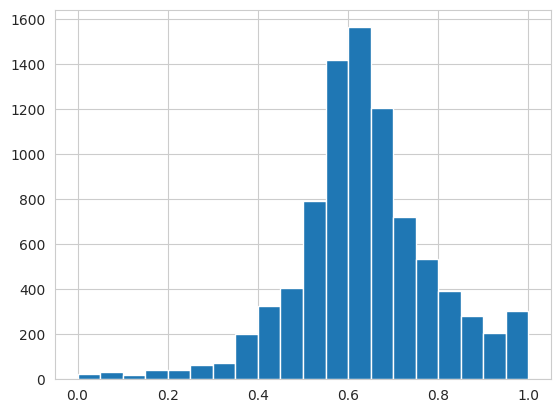

In [ ]:
# extracts the predicted probabilities for class 1
# and creates a histogram of the predicted probabilities
y_test_proba = logicPredict[:,1]
series = pd.Series(y_test_proba)
series.hist(bins=20)

In [ ]:
# for a cutoff, determine if prediction would be 0 or 1 for each observation
cutoff = .5 # sample cutoff, can set to any value between 0 and 1
y_test_proba_series = pd.Series(y_test_proba)
y_test_pred = y_test_proba_series.apply(lambda x: 1 if x>cutoff else 0)
y_test_pred.head(5)

0    1
1    1
2    1
3    0
4    1
dtype: int64

In [ ]:
# given truth and the model+cutoff prediction, generate a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[ 533,  921],
       [ 700, 6492]])

In [ ]:
# convenience function for calculating any confusion matrix ratio
def cmratio(correct, incorrect):
   if correct+incorrect == 0: return 0
   else: return correct / (correct+incorrect) * 100

# display confusion matrix
def displayCM(cm, w=4):
   accuracy = cmratio(cm[0][0]+cm[1][1], cm[0][1]+cm[1][0])
   sensitivity = cmratio(cm[1][1], cm[1][0])
   specificity = cmratio(cm[0][0], cm[0][1])
   precision = cmratio(cm[1][1], cm[0][1])
   npv = cmratio(cm[0][0], cm[1][0])
   fmt = str(w)+"d"
   fmt1 = ".1f"
   print(' TP:', format(cm[1][1],fmt), 'FN:',
      format(cm[1][0],fmt), format(sensitivity,fmt1))
   print(' FP:', format(cm[0][1],fmt), 'TN:',
      format(cm[0][0],fmt), format(specificity,fmt1))
   print(' ', format(precision,fmt1), ' ', format(npv, fmt1))
   print('Accuracy:', format(accuracy, fmt1))

# Use the displayCM function to see the model accuracy
displayCM(cm)

 TP: 6492 FN:  700 90.3
 FP:  921 TN:  533 36.7
  87.6   43.2
Accuracy: 81.3


### **Predictive analysis 3: Using Naive Bayes classifier to predict properties' legal type based on Zone district, Zone classification and Postal code**

In [ ]:
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For attractive and informative statistical graphics

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data preparation
# Load the Vancouver Property Assessment dataset using pandas. Set the building year range from 2006 to 2014
VanPro = pd.read_csv('/content/drive/My Drive/INF1340/Sources/property.csv')  # Load the property data
filtered_VanPro = VanPro[(VanPro['YEAR_BUILT'] >= 2006) & (VanPro['YEAR_BUILT'] <= 2014)]

# Drop the TAX_ASSESSMENT_YEAR as they are all assessed in 2016
filtered_VanPro = filtered_VanPro.drop(columns=['TAX_ASSESSMENT_YEAR'])

# Transfer year column into integer
filtered_VanPro['YEAR_BUILT'] = filtered_VanPro['YEAR_BUILT'].astype(int)
filtered_VanPro['BIG_IMPROVEMENT_YEAR'] = filtered_VanPro['BIG_IMPROVEMENT_YEAR'].astype(int)

# Convert year built to house age to minimize the additional impact of year built on the house's marketing value
current_year = 2014
filtered_VanPro['HOUSE_AGE'] = current_year - filtered_VanPro['YEAR_BUILT']

# Drop rows with null values in the specified columns
filtered_VanPro_cleaned = filtered_VanPro.dropna()
filtered_VanPro_cleaned.head()

,PID,LEGAL_TYPE,ZONE_DISTRICT,ZONE_CLASSIFICATION,STREET_NAME,PROPERTY_POSTAL_CODE,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,HOUSE_AGE
40,011-041-650,LAND,RS-1,One Family Dwelling,CROWN CRES,V6R 2A8,5263000.0,929000.0,4354000.0,1008000.0,2009,2010,21110.84,5
41,027-506-801,STRATA,C-3A,Commercial,8TH AVE W,V6J 0B1,359000.0,178000.0,339000.0,174000.0,2008,2008,1699.97,6
43,029-410-771,STRATA,CD-1 (517),Comprehensive Development,CORNISH ST,V6P 0C2,236000.0,213000.0,77900.0,352000.0,2014,2014,1421.39,0
61,027-851-923,STRATA,CD-1 (456),Comprehensive Development,CROWE ST,V5Y 0A2,350000.0,178000.0,317000.0,173000.0,2009,2009,1671.48,5
164,013-389-033,LAND,RT-8,Two Family Dwelling,CORNWALL AVE,V6K 1C1,2937000.0,1785000.0,2595000.0,598000.0,2014,2014,14537.30,0


In [ ]:
# Use the split() method to create two new fields, one for the first 3 digit of post code and one for last 3 digit of post code
# Drop the rows with NaN in the post code column
filtered_VanPro_cleaned = filtered_VanPro_cleaned.dropna(subset=['PROPERTY_POSTAL_CODE'])

# Split the strings in 'PROPERTY_POSTAL_CODE' by the blank space and create two new columns for the first 3 digit and last 3 digit of the post codes
split_columns = filtered_VanPro_cleaned['PROPERTY_POSTAL_CODE'].str.split(expand=True)

# Rename the 2 newly created columns
split_columns = split_columns.rename(columns={0: 'First_Three_Code', 1: 'Last_Three_Code'})

# Concatenate the original DataFrame with the newly split and renamed columns
filtered_VanPro_cleaned = pd.concat([filtered_VanPro_cleaned, split_columns], axis=1)

In [ ]:
# Use thee split() method to redefine the zone district by letters before the numbers
split_columns2 = filtered_VanPro_cleaned['ZONE_DISTRICT'].str.split('-', expand=True)

# Rename the 2 newly created columns
split_columns2 = split_columns2.rename(columns={0: 'Zone_District_Letter', 1: 'Zone_District_Number'})

# Concatenate the original DataFrame with the newly split and renamed columns
filtered_VanPro_cleaned = pd.concat([filtered_VanPro_cleaned, split_columns2], axis=1)

In [ ]:
# Strata housing is an arrangement where you buy a home within a community.
# Owning a home in this way involves sharing, and owning, common space with others.
# Some real estate analysts say that Strata laws help raise housing prices as
# there is the wide range of potential buyers who are looking for those types of homes.
# Below I will use Multinomial Naïve Bayes (Because the variables are categorical variables with more than two values)
# to see if there are certain pattens for different property types
# Features: zone district letter, zone classification and first three post code

# Create a new dataframe to only contain the features I want to study and the type of properties

VanPro_legal = filtered_VanPro_cleaned[['Zone_District_Letter','ZONE_CLASSIFICATION','First_Three_Code','LEGAL_TYPE']]

# Calling describe on the 'legal type' column to see different types of properties
VanPro_legal.describe()

,Zone_District_Letter,ZONE_CLASSIFICATION,First_Three_Code,LEGAL_TYPE
count,34583,34583,34583,34583
unique,17,9,29,3
top,CD,Comprehensive Development,V6B,STRATA
freq,14436,19204,8616,27817


In [ ]:
# Convert categorical variables into dummies for later analysis
X = pd.get_dummies(VanPro_legal.drop('LEGAL_TYPE', axis=1))  # one-hot encode categorical features
y = VanPro_legal['LEGAL_TYPE']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

In [ ]:
# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Make predictions on the testing data
nb_predictions = nb_classifier.predict(X_test)

In [ ]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, nb_predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


In [ ]:
# Display confusion matrix and other evaluation metrics
print(classification_report(y_test, nb_predictions))
print(confusion_matrix(y_test, nb_predictions))

              precision    recall  f1-score   support

        LAND       0.98      0.93      0.95      1360
       OTHER       0.00      0.00      0.00         1
      STRATA       0.98      0.99      0.99      5556

    accuracy                           0.98      6917
   macro avg       0.65      0.64      0.65      6917
weighted avg       0.98      0.98      0.98      6917

[[1262    0   98]
 [   0    0    1]
 [  31    0 5525]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
